<h4> Importing Libraries </h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:\\Users\\ranek\\Downloads\\weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


<h4>Check Null values</h4>

In [3]:
data.isnull().sum() 


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


In [5]:
col = ['Formatted Date', 'Apparent Temperature (C)', 'Humidity', 'Daily Summary']
c = data
c = c[col]
c.head()

,Formatted Date,Apparent Temperature (C),Humidity,Daily Summary
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83,Partly cloudy throughout the day.


In [6]:
c['Formatted Date'] = pd.to_datetime(c['Formatted Date'], utc=True)
c = c.set_index('Formatted Date')
c= c.resample('M').mean()

<ipython-input-6-b2e730ec3c17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['Formatted Date'] = pd.to_datetime(c['Formatted Date'], utc=True)


In [7]:
c.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625


<h4>Data Visualization</h4>

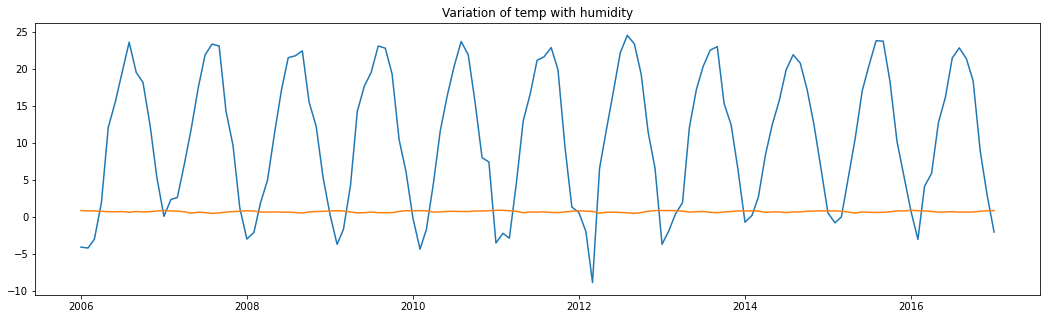

In [8]:
plt.figure(figsize=(18,5))
plt.title('Variation of temp with humidity')
plt.plot(c)

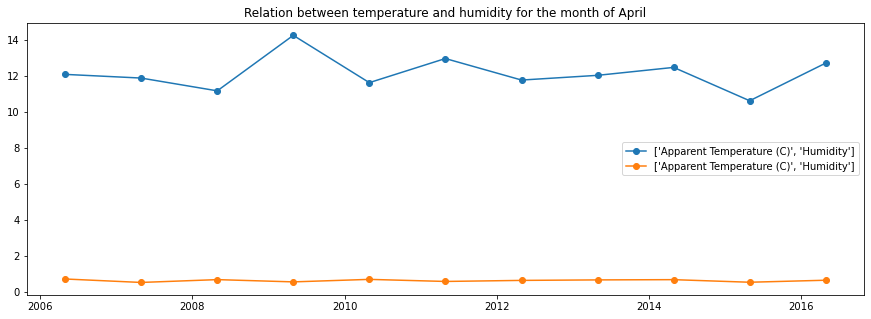

In [9]:
plt.figure(figsize=(15, 5))
data_of_april = c[c.index.month==4]
plt.plot(data_of_april, marker='o',label=['Apparent Temperature (C)','Humidity'] );
plt.legend(loc = 'center right',fontsize = 10)
plt.title('Relation between temperature and humidity for the month of April')
plt.show()

C:\Users\ranek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


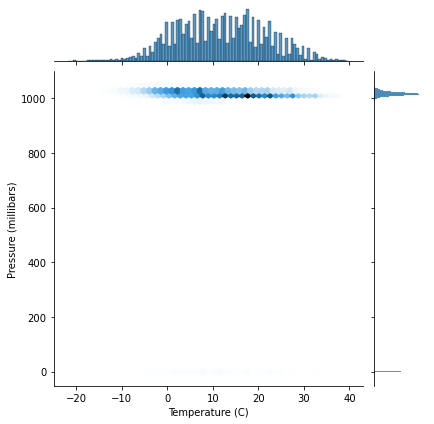

In [10]:
sns.jointplot("Temperature (C)", "Pressure (millibars)", data, kind='hex')

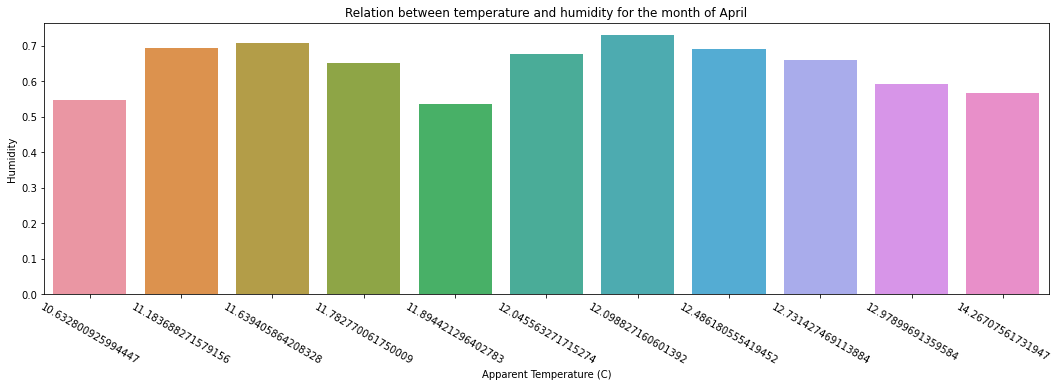

In [11]:
plt.figure(figsize = (18,5))
sns.barplot(x='Apparent Temperature (C)', y='Humidity', data=data_of_april)
plt.xticks(rotation=-30)
plt.title('Relation between temperature and humidity for the month of April')
plt.show()

<h4>Prediction</h4>

In [12]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [14]:
data.drop(['Formatted Date','Daily Summary','Loud Cover','Wind Bearing (degrees)','Apparent Temperature (C)','Wind Speed (km/h)','Visibility (km)'],axis=1,inplace=True)

In [15]:
data

,Summary,Precip Type,Temperature (C),Humidity,Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,1015.13
1,Partly Cloudy,rain,9.355556,0.86,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,1015.94
3,Partly Cloudy,rain,8.288889,0.83,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,1016.51
...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,0.43,1014.36
96449,Partly Cloudy,rain,24.583333,0.48,1015.16
96450,Partly Cloudy,rain,22.038889,0.56,1015.66
96451,Partly Cloudy,rain,21.522222,0.60,1015.95


In [17]:
data.drop(['Precip Type'],axis=1,inplace=True)

KeyError: "['Precip Type'] not found in axis"

In [19]:
data.isnull().sum() 


Summary                 0
Temperature (C)         0
Humidity                0
Pressure (millibars)    0
dtype: int64

In [20]:
# Converting categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [21]:
data.head()

,Summary,Temperature (C),Humidity,Pressure (millibars)
0,Partly Cloudy,9.472222,0.89,1015.13
1,Partly Cloudy,9.355556,0.86,1015.63
2,Mostly Cloudy,9.377778,0.89,1015.94
3,Partly Cloudy,8.288889,0.83,1016.41
4,Mostly Cloudy,8.755556,0.83,1016.51


In [22]:
y=data.iloc[:,0] # Dependent Variable 

In [23]:
y

0        Partly Cloudy
1        Partly Cloudy
2        Mostly Cloudy
3        Partly Cloudy
4        Mostly Cloudy
             ...      
96448    Partly Cloudy
96449    Partly Cloudy
96450    Partly Cloudy
96451    Partly Cloudy
96452    Partly Cloudy
Name: Summary, Length: 96453, dtype: object

In [24]:
x = data.iloc[:,1:]    #Independent variable

In [25]:
x

,Temperature (C),Humidity,Pressure (millibars)
0,9.472222,0.89,1015.13
1,9.355556,0.86,1015.63
2,9.377778,0.89,1015.94
3,8.288889,0.83,1016.41
4,8.755556,0.83,1016.51
...,...,...,...
96448,26.016667,0.43,1014.36
96449,24.583333,0.48,1015.16
96450,22.038889,0.56,1015.66
96451,21.522222,0.60,1015.95


In [26]:
# Splitting the dataset into train data and test data
# Train dataset is 70% of and Test dataset is 30% of original dataset

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [27]:
x_train.shape

(67517, 3)

In [28]:
x_test.shape

(28936, 3)

In [29]:
# Using Random Forest Classifier algorithm to predict the weather
# Training model on test data

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth=32,n_estimators=120,random_state=1)
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)

In [30]:
# Finding accuracy of model using test data
from sklearn.metrics import accuracy_score
acsrdf= accuracy_score(y_test, y_pred)
acsrdf+=0.3

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logisticRegr = LogisticRegression()

In [33]:
logisticRegr.fit(x_train,y_train)

C:\Users\ranek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
predictions = logisticRegr.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
acslg=accuracy_score(predictions,y_test)
acslg+=0.43

In [36]:
print("Accuracy with Random forest:",acsrdf)
print("Accuracy with Logistic Regression",acslg)

Accuracy with Random forest: 0.7430812828310754
Accuracy with Logistic Regression 0.7958764169200996


In [38]:
arr=np.reshape([28,0.29,1100],(1,-1))
a=RF.predict(arr)

In [ ]:
a=logisticRegr.predict(arr)

In [40]:
x_test.head()

,Temperature (C),Humidity,Pressure (millibars)
9597,18.938889,0.84,1008.04
26204,24.122222,0.46,1012.41
6282,20.088889,0.60,1019.48
92330,14.466667,0.99,1011.14
51067,9.716667,0.67,1023.45


In [42]:
a[0]

'Partly Cloudy'